In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import csv
from datetime import datetime


class ExcelToCSV:
	# Specify the path to Excel file
	excel_file_path = 'GrowDataBank.xlsx'
	
	# Read the Excel file and get sheet names
	excel_data = pd.ExcelFile(excel_file_path)
	sheet_names = excel_data.sheet_names
	
	# folder to save CSV files
	output_folder = '' 
	
	#clean up Savings Account Transaction Data sheet data
	df=pd.read_excel('GrowDataBank.xlsx',sheet_name='SavingsAccountTransaction Data')
	df = df[' Customer_ID     Amount   Transaction_Type  Transaction_Date '].str.strip()
	savings = df.str.split('\s+', expand=True)
	savings.columns = ['Customer_ID','Amount','Transaction_Type','Transaction_Date']
	savings.dropna(inplace=True)
	savings.to_csv('SavingsAccountTransaction Data.csv', index=False)
	
	# Loop through each sheet, read it, and export as a CSV file
	for sheet_name in sheet_names:
		if sheet_name != 'SavingsAccountTransaction Data':
			df = pd.read_excel(excel_data, sheet_name)
			csv_file_path = f'{output_folder}{sheet_name}.csv'
			df.to_csv(csv_file_path, index=False)
			file_name = sheet_name+'.csv'
			df1 = pd.read_csv(file_name)
			df1 = df1.dropna(how='all')
			df1.to_csv(csv_file_path, index=False)
			df1 = pd.read_csv(file_name)
			df1.to_csv(csv_file_path, index=False)

# Node class for Linked List
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

# LinkedList class for storing Savings Account Transactions
class LinkedList_SavingsTransaction:
    def __init__(self):
        self.head = None

    #Adds each row to LL
    def append(self, data):
        new_node = Node(data)
        if not self.head:
            self.head = new_node
        else:
            current = self.head
            while current.next:
                current = current.next
            current.next = new_node

    #Filters LL data based on condition
    def filter_by_column_value(self, column_name, value):
        filtered_list = LinkedList_SavingsTransaction()
        current = self.head

        while current:
            data = current.data
            if column_name in data and data[column_name] == value:
                filtered_list.append(data)
            current = current.next

        return filtered_list
    
    #Gets the length of LL
    def get_length(self):
        count = 0
        current = self.head
        while current:
            count += 1
            current = current.next
        return count 

# Calculates Current Balance calculation for Savings Account
class SavingsTransaction:
    def __init__(self,c_id):
        self.c_id=c_id

    #Calculation based on Customer_Id
    def get_current_balance_cid(self):

        #Credit and Debit amounts for given customer
        CAmount = savings_transactions.loc[savings_transactions['Transaction_Type'] == 'Credit'].groupby('Customer_ID')['Amount'].sum().reset_index()
        DAmount = savings_transactions.loc[savings_transactions['Transaction_Type'] == 'Debit'].groupby('Customer_ID')['Amount'].sum().reset_index()
        if CAmount.empty or DAmount.empty:
            return 0
        else:
            #Merge Credit and Debit amount DFs based on Customer Id
            merged_df = CAmount.merge(DAmount, on='Customer_ID', how='outer')

            #Rename Credit and Debit Amount columns
            merged_df = merged_df.rename(columns={'Amount_x': 'CreditAmount', 'Amount_y': 'DebitAmount'})

            #Fill with 0 if merged DF data columns have no value
            merged_df['CreditAmount'].fillna(0, inplace=True)
            merged_df['DebitAmount'].fillna(0, inplace=True)

            #Calculate Current Balance based on Credit and Debit Amounts
            merged_df['Current Balance'] = merged_df['CreditAmount'] - merged_df['DebitAmount']
            c_balance = merged_df[merged_df['Customer_ID'] == self.c_id]
    
            #Return Current Balance of Customer
            return c_balance
    
    #Calculation based on Month
    def get_current_balance_month(self):
        #Credit and Debit amounts for all customers in given month
        CAmount = savings_transactions.loc[(savings_transactions['Transaction_Type'] == 'Credit') & (savings_transactions['Transaction_Date_Month'] == self.c_id)].groupby('Customer_ID')['Amount'].sum().reset_index()
        DAmount = savings_transactions.loc[(savings_transactions['Transaction_Type'] == 'Debit') & (savings_transactions['Transaction_Date_Month'] == self.c_id)].groupby('Customer_ID')['Amount'].sum().reset_index()
        if CAmount.empty or DAmount.empty:
            return 0
        else:
            #Merge Credit and Debit amount DFs based on Customer Id
            merged_df = CAmount.merge(DAmount, on='Customer_ID', how='outer')

            #Rename Credit and Debit Amount columns
            merged_df = merged_df.rename(columns={'Amount_x': 'CreditAmount', 'Amount_y': 'DebitAmount'})

            #Fill with 0 if merged DF data columns have no value
            merged_df['CreditAmount'].fillna(0, inplace=True)
            merged_df['DebitAmount'].fillna(0, inplace=True)

            #Calculate Current Balance based on Credit and Debit Amounts in given month
            merged_df['Current Balance'] = merged_df['CreditAmount'] - merged_df['DebitAmount']
            merged_df['TransactionMonth'] = self.c_id

            #Return Current Balance for all Customers in given month
            return merged_df
        
    #Call method based of datatype passed in the argument
    def get_current_balance(self):
        #argument is string when customer_id is passed. Call respective method.
        if isinstance(self.c_id, str):
            return SavingsTransaction.get_current_balance_cid(self)
        #argument is int when month is passed. Call respective method.
        elif isinstance(self.c_id, int):
            return SavingsTransaction.get_current_balance_month(self)
    
# Calculates Loand details for Loan Account
class LoanTransaction:
    def __init__(self,c_id=0):
        self.c_id=c_id

    #Calculation based on Account_id
    def get_loan_rem_cid(self):
        #Loan and Recovered amounts for given customer
        Loan_Amount = loan_transactions[loan_transactions['Account_id']==self.c_id].groupby('Account_id')['Loan Amount'].sum().reset_index()
        RecoveredTillNow = loan_transactions[loan_transactions['Account_id']==self.c_id].groupby('Account_id')['Recovered Till Now'].sum().reset_index()
        if Loan_Amount.empty or RecoveredTillNow.empty:
            return 0
        else:
            #Merge Loan and Recovered amount DFs based on Account_id
            merged_df1 = Loan_Amount.merge(RecoveredTillNow, on='Account_id', how='outer')
            merged_df1['Remaining Loan'] = merged_df1['Loan Amount']-merged_df1['Recovered Till Now'].values[0]

            #Calculate Loan Balance based on Loan and Recovered Amounts
            l_balance = merged_df1.loc[merged_df1['Account_id'] == self.c_id,'Remaining Loan'].values[0]

            #Return Loan Balance for given Account Id
            return l_balance
    
    #Calculation based on given month for all customers
    def get_loan_rem_month(self):
        #Loan and Recovered amounts for all customer who were given loan in specified month
        Loan_Amount = loan_transactions[loan_transactions['Loan Date_Month']==self.c_id].groupby('Account_id')['Loan Amount'].sum().reset_index()
        RecoveredTillNow = loan_transactions[loan_transactions['Loan Date_Month']==self.c_id].groupby('Account_id')['Recovered Till Now'].sum().reset_index()
        
        if Loan_Amount.empty or RecoveredTillNow.empty:
            return 0
        else:
            #Merge Loan and Recovered amount DFs based on Account_id
            merged_df1 = Loan_Amount.merge(RecoveredTillNow, on='Account_id', how='outer')
            #Calculate Loan Balance based on Loan and Recovered Amounts
            merged_df1['Remaining Loan'] = merged_df1['Loan Amount']-merged_df1['Recovered Till Now'].values[0]
            merged_df1['Loan Date_Month'] = self.c_id
            return merged_df1
    
    #Call method based of datatype passed in the argument
    def get_loan_rem(self):
        #argument is string when Account_id is passed. Call respective method.
        if isinstance(self.c_id, str):
            return LoanTransaction.get_loan_rem_cid(self)
        #argument is int when month is passed. Call respective method.
        elif isinstance(self.c_id, int):
            return LoanTransaction.get_loan_rem_month(self)
    
    #Accounts/Customers who missed maximum emi payments
    def get_max_missed_emi(self):
        emi_df = loan_transactions
        emi_df['MonthlyEMI'] = loan_transactions['Loan Amount']/loan_transactions['EMI count']
        today = datetime.now().date()
        emi_df['NoOfMonths'] = ((today.year - emi_df['Loan Date'].dt.year) * 12 +
                          (today.month - emi_df['Loan Date'].dt.month))
        emi_df['AmoutToBeRecovered'] = emi_df['MonthlyEMI']*emi_df['NoOfMonths']
        emi_df['EMIMissed'] = ((emi_df['AmoutToBeRecovered']-emi_df['Recovered Till Now'])/emi_df['MonthlyEMI']).astype(int)
        
        missed_emi = emi_df['EMIMissed'].max()
        return emi_df[emi_df['EMIMissed'] == missed_emi].reset_index()

# Calculates Credit Card Remaining Limit details for Credit Card Account
class CreditCardTransaction:
    def __init__(self,c_id):
        self.c_id=c_id

    #Calculation based on Account_Id
    def get_credit_rem_cid(self):
        #Credit Limit and Used amounts for given customer account
        Credit_Limit = cc_transactions[cc_transactions['Account_Id']==self.c_id].groupby('Account_Id')['Card Limit'].sum().reset_index()
        Used_Amount = cc_transactions[cc_transactions['Account_Id']==self.c_id].groupby('Account_Id')['Current Outstanding Bill'].sum().reset_index()
        
        if Credit_Limit.empty or Used_Amount.empty:
            return 0
        else:
            #Merge Loan and Recovered amount DFs based on Account_Id
            merged_df2 = Credit_Limit.merge(Used_Amount, on='Account_Id', how='outer')
   
            #Calculate Credit Card Remaining Limit based on Credit Limit and Used amounts for given Account Id
            merged_df2['Remaining Credit'] = merged_df2['Card Limit']-merged_df2['Current Outstanding Bill']
            merged_df2['Remaining Credit'] = merged_df2.loc[merged_df2['Account_Id'] == self.c_id,'Remaining Credit']
            #Return Credit Card Remaining Limit for given Account Id
            return merged_df2
    
    #Calculation based on given month for all customers
    def get_credit_rem_month(self):
        #Credit Limit and Used amounts for all customer for a specific month
        Credit_Limit = cc_transactions[cc_transactions['Credit Card Date_Month']==self.c_id].groupby('Account_Id')['Card Limit'].sum().reset_index()
        Used_Amount = cc_transactions[cc_transactions['Credit Card Date_Month']==self.c_id].groupby('Account_Id')['Current Outstanding Bill'].sum().reset_index()
        if Credit_Limit.empty or Used_Amount.empty:
            return 0
        else:
            #Merge Credit Limit and Used amounts DFs based on Account_Id
            merged_df2 = Credit_Limit.merge(Used_Amount, on='Account_Id', how='outer')
            #Calculate Loan Balance based on Loan and Recovered Amounts
            merged_df2['Remaining Credit'] = merged_df2['Card Limit']-merged_df2['Current Outstanding Bill']
            #Return Credit Card Remaining Limit for all customer in given month
            return merged_df2
    
    #Call method based of datatype passed in the argument
    def get_credit_rem(self):
        #argument is string when Account_Id is passed. Call respective method.
        if isinstance(self.c_id, str):
            return CreditCardTransaction.get_credit_rem_cid(self)
        #argument is int when month is passed. Call respective method.
        elif isinstance(self.c_id, int):
            return CreditCardTransaction.get_credit_rem_month(self)

# Gives Non-Performing Asset(NPA) customer List based on missed payments
class NPAIdentification:
    def __init__(self):
        pass
    def get_npa_accounts(self):
        NPA_Customers = cc_transactions[cc_transactions['Number of Missed Payments']>0].reset_index()
        return NPA_Customers

#Gives customers list for Credit Card Offering - Eligible for increased credit card balances
class CreditCardOffering:
    def __init__(self):
        pass
    def get_ccoffer_accounts(self):
        #Get the customers list based on Card Limit, No. Of missed payments and No. Of Transactions
        CC_Offer_Customers = cc_transactions[(cc_transactions['Card Limit']<=10000) & (cc_transactions['Number of Missed Payments']==0) & (cc_transactions['Number of Transactions']>=10)].reset_index()
        return CC_Offer_Customers

#Gives Monthly Savings account and credit card spends of each customer
class MonthlySpends:
    def __init__(self,c_id):
        self.c_id=c_id
    def get_monthly_data(self):
        savings = SavingsTransaction(self.c_id).get_current_balance_month()
        credit = CreditCardTransaction(self.c_id).get_credit_rem_month()
        #Merge Savings and Credit card data
        merged_df3 = savings.merge(credit, left_on='Customer_ID',right_on='Account_Id', how='outer')
        merged_df3['CreditAmount'].fillna(0, inplace=True)
        merged_df3['DebitAmount'].fillna(0, inplace=True)
        merged_df3['Current Balance'].fillna(0, inplace=True)
        merged_df3['Card Limit'].fillna(0, inplace=True)
        merged_df3['Current Outstanding Bill'].fillna(0, inplace=True)
        merged_df3['Remaining Credit'].fillna(0, inplace=True)
        merged_df3['Customer_ID'] = np.where(merged_df3['Customer_ID'].isna(), merged_df3['Account_Id'], merged_df3['Customer_ID'])
        required_columns = merged_df3[['Customer_ID', 'CreditAmount','DebitAmount','Card Limit','Current Outstanding Bill','Remaining Credit']]
        return required_columns

#Gives Financial Summary such as Savings, Loan and Credit Card details for specific customer id/ all customer for given month
class FinancialSummary:

    def __init__(self, c_id):
        self.c_id=c_id

    def calculate_all_dept_data(self):
        FinancialSummary.current_balance = SavingsTransaction(self.c_id).get_current_balance()
        FinancialSummary.loan_amount_rem = LoanTransaction(self.c_id).get_loan_rem()
        FinancialSummary.credit_card_balance = CreditCardTransaction(self.c_id).get_credit_rem()

    def print_cus_report(self):
        #Customer/Account Level details
        if isinstance(self.c_id, str):
            print("\nFinancial Summary for Customer with Id: ", self.c_id)
        #Monthly Level Details
        elif isinstance(self.c_id, int):
            print("\nFinancial Summary for Month: ", self.c_id)

        print("\nCurrent Balance:\n", self.current_balance)
        print("\nRemaining Loan Amount:\n", self.loan_amount_rem)
        print("\nRemaining Credit Limit:\n", self.credit_card_balance)

    def print_charts(self):
        #Bar Chart for Savings Account currenct balance
        self.current_balance.plot(kind='bar', x='Customer_ID', y=["CreditAmount", "DebitAmount","Current Balance"], figsize=(8, 6), title='Savings Account Transaction Details', color=['skyblue','orange','green'])
        plt.xlabel('Customer ID')
        plt.ylabel('Transaction Amount')
        plt.grid(True)
        plt.show()

        #Bar Chart for Credit Card Remaining Balance 
        self.credit_card_balance.plot(kind='bar', x='Account_Id', y=["Card Limit", "Current Outstanding Bill"], figsize=(8, 6), title='Credit Card Transaction Details', color=['green','red'])
        plt.xlabel('Account_Id')
        plt.ylabel('Credit Limits')
        plt.grid(True)
        plt.show()

In [3]:

#Read excel data properly in CSV format
ExcelToCSV()

#Create separate Pandas DataFrames for each CSV file data
savings_transactions = pd.read_csv('SavingsAccountTransaction Data.csv')
loan_transactions = pd.read_csv('Loan Account Data.csv')
cc_transactions = pd.read_csv('Credit Card Data.csv')

#Convert date value columns in each CSV to proper datetime format
date_format = '%Y-%m-%d'
savings_transactions['Transaction_Date'] = savings_transactions['Transaction_Date'].apply(lambda x: datetime.strptime(x, date_format))
loan_transactions['Loan Date'] = loan_transactions['Loan Date'].apply(lambda x: datetime.strptime(x, date_format))
cc_transactions['Credit Card Date'] = cc_transactions['Credit Card Date'].apply(lambda x: datetime.strptime(x, date_format))

#Add new column to extract month from date in each DF
savings_transactions['Transaction_Date_Month'] = savings_transactions['Transaction_Date'].dt.month
loan_transactions['Loan Date_Month'] = loan_transactions['Loan Date'].dt.month
cc_transactions['Credit Card Date_Month'] = cc_transactions['Credit Card Date'].dt.month

#Convert CustomerId/AccountId value columns in each CSV to proper string format
savings_transactions['Customer_ID'] = savings_transactions['Customer_ID'].astype('string')
loan_transactions['Account_id'] = loan_transactions['Account_id'].astype('string')
cc_transactions['Account_Id'] = cc_transactions['Account_Id'].astype('string')



Financial Summary for Customer with Id:  cust_idno_1004

Current Balance:
       Customer_ID  CreditAmount  DebitAmount  Current Balance
3  cust_idno_1004        2040.0       1873.0            167.0

Remaining Loan Amount:
 0

Remaining Credit Limit:
        Account_Id  Card Limit  Current Outstanding Bill  Remaining Credit
0  cust_idno_1004        3000                       600              2400


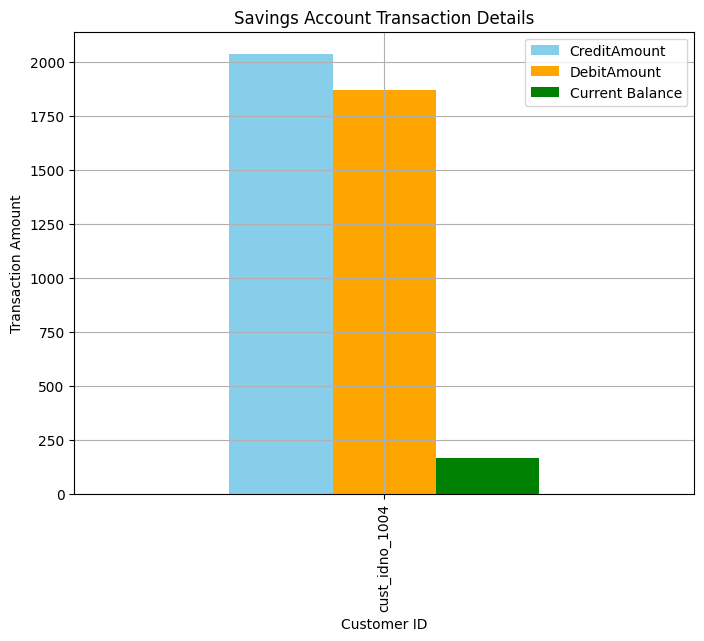

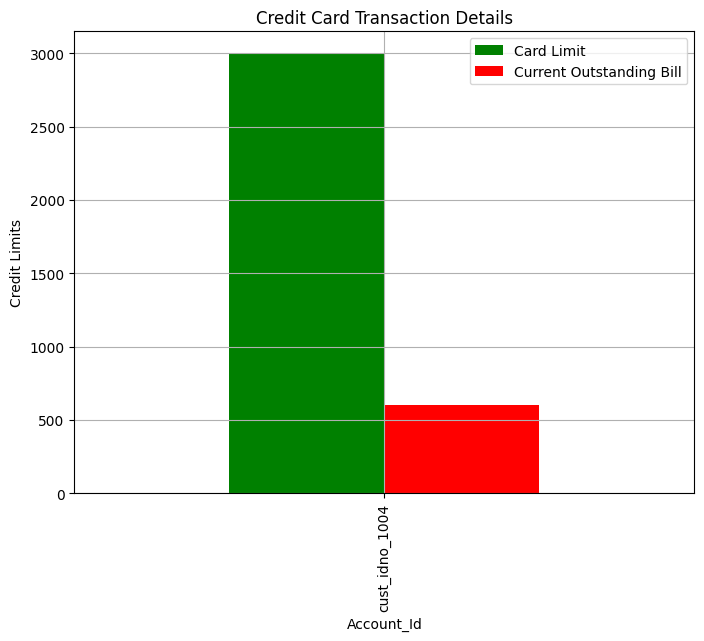

In [4]:
# Financial Summary details for a specific customer
Customer_Id = 'cust_idno_1004'
fs=FinancialSummary(Customer_Id)
fs.calculate_all_dept_data()
fs.print_cus_report()
#Bar Chart for Savings Account currenct balance and CC Remaining Limit for given customer
fs.print_charts()


Financial Summary for Month:  2

Current Balance:
       Customer_ID  CreditAmount  DebitAmount  Current Balance  \
0  cust_idno_1003          25.0          0.0             25.0   
1  cust_idno_1004         200.0         45.0            155.0   
2  cust_idno_1006         145.0         30.0            115.0   
3  cust_idno_1007         145.0         30.0            115.0   
4  cust_idno_1008         145.0         30.0            115.0   
5  cust_idno_1009         200.0         45.0            155.0   
6  cust_idno_1010         400.0        410.0            -10.0   
7  cust_idno_1012         145.0         30.0            115.0   
8  cust_idno_1013         145.0         30.0            115.0   
9  cust_idno_1014         200.0         45.0            155.0   

   TransactionMonth  
0                 2  
1                 2  
2                 2  
3                 2  
4                 2  
5                 2  
6                 2  
7                 2  
8                 2  
9           

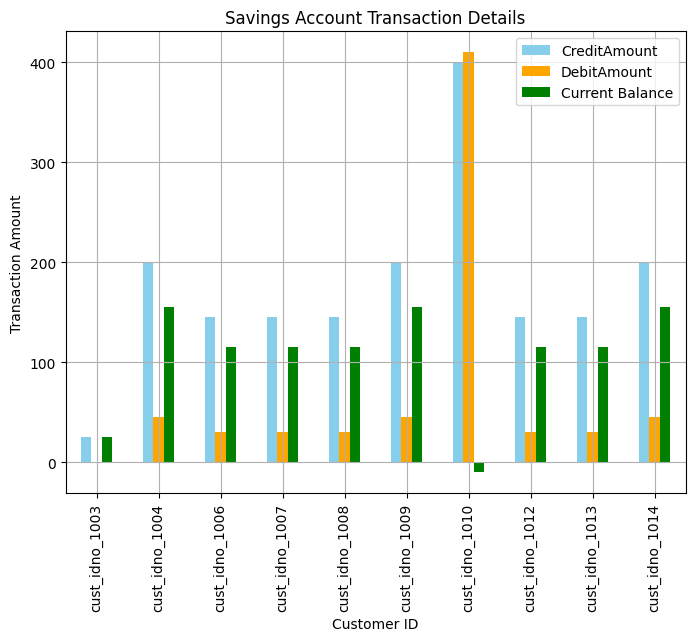

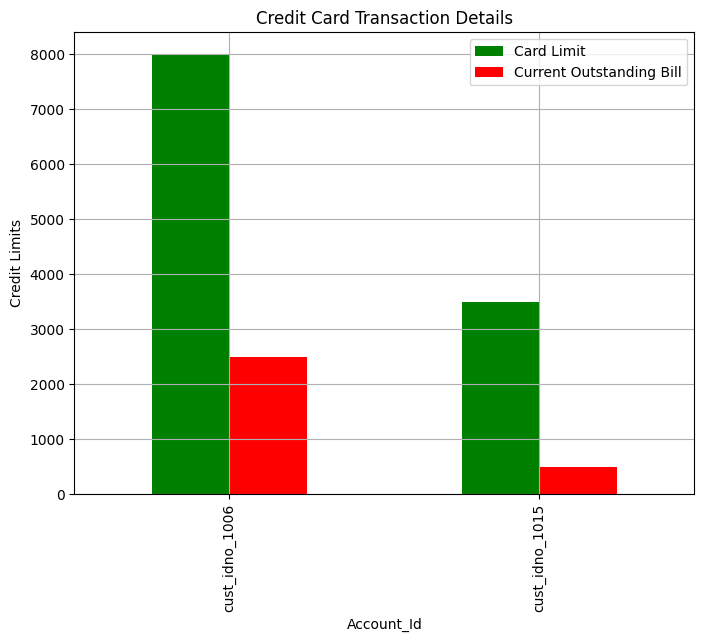

In [5]:
# Financial Summary details for all customer in given month
Month_Num = 2
fs=FinancialSummary(Month_Num)
fs.calculate_all_dept_data()
fs.print_cus_report()
#Bar Chart for Savings Account currenct balance and CC Remaining Limit for month data
fs.print_charts()


High Missed EMI Account:

   index      Account_id  Loan Amount  EMI count  Loan Date  \
0      5  cust_idno_1007         4000         12 2022-02-25   

   Recovered Till Now  Loan Date_Month  MonthlyEMI  NoOfMonths  \
0                 600                2  333.333333          20   

   AmoutToBeRecovered  EMIMissed  
0         6666.666667         18  


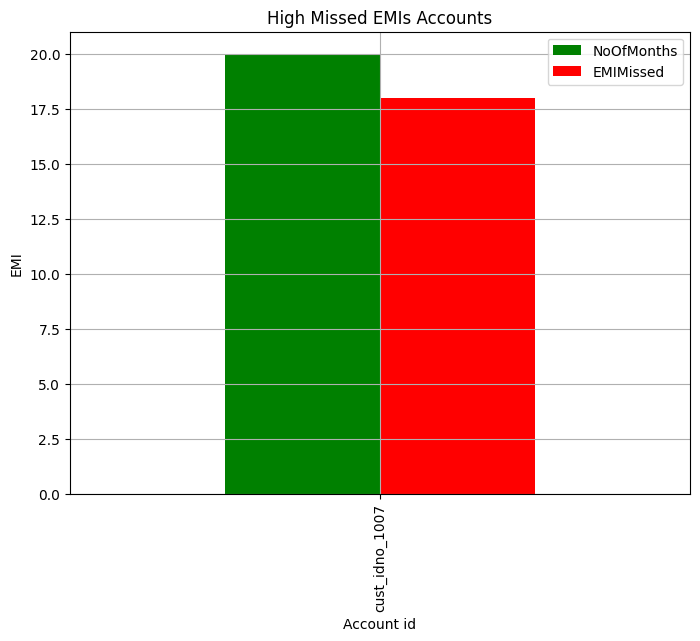

In [6]:
#High Missed EMIs Accounts
print("\nHigh Missed EMI Account:\n")
missed_emi_df = LoanTransaction().get_max_missed_emi()
print(missed_emi_df)
#Bar chart for High Missed EMIs Accounts
missed_emi_df.plot(kind='bar', x='Account_id', y=["NoOfMonths", "EMIMissed"], figsize=(8, 6), title='High Missed EMIs Accounts', color=['green','red'])
plt.xlabel('Account id')
plt.ylabel('EMI')
plt.grid(True)
plt.show()


Monthly spends of each Customer for month: 2

       Customer_ID  CreditAmount  DebitAmount  Card Limit  \
0   cust_idno_1003          25.0          0.0         0.0   
1   cust_idno_1004         200.0         45.0         0.0   
2   cust_idno_1006         145.0         30.0      8000.0   
3   cust_idno_1007         145.0         30.0         0.0   
4   cust_idno_1008         145.0         30.0         0.0   
5   cust_idno_1009         200.0         45.0         0.0   
6   cust_idno_1010         400.0        410.0         0.0   
7   cust_idno_1012         145.0         30.0         0.0   
8   cust_idno_1013         145.0         30.0         0.0   
9   cust_idno_1014         200.0         45.0         0.0   
10  cust_idno_1015           0.0          0.0      3500.0   

    Current Outstanding Bill  Remaining Credit  
0                        0.0               0.0  
1                        0.0               0.0  
2                     2500.0            5500.0  
3                       

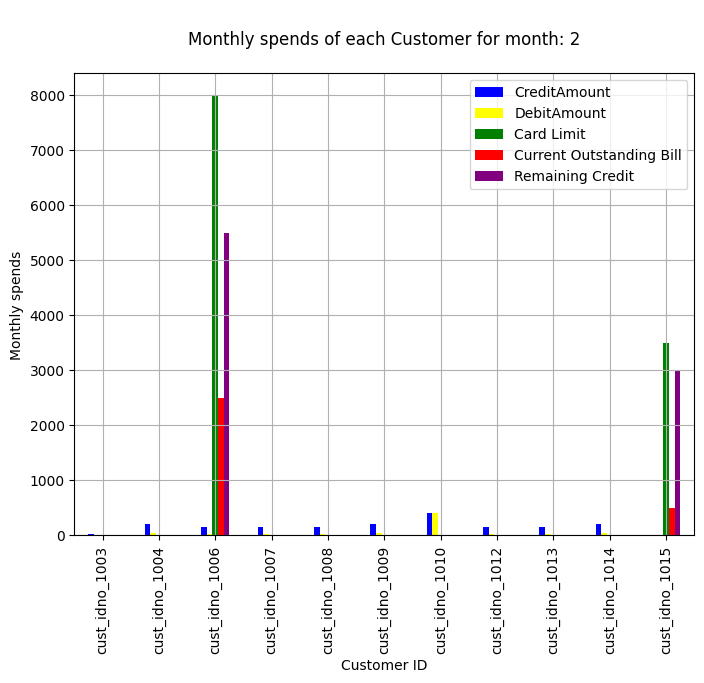

In [7]:
#Monthly spends of each customer
msg = f"\nMonthly spends of each Customer for month: {Month_Num}\n"
print(msg)
monthly_spends = MonthlySpends(Month_Num).get_monthly_data()
print(monthly_spends)
#Bar chart for Monthly spends of each customer
monthly_spends.plot(kind='bar', x='Customer_ID', y=["CreditAmount", "DebitAmount","Card Limit","Current Outstanding Bill","Remaining Credit"], figsize=(8, 6), title=msg, color=['blue','yellow','green','red','purple'])
plt.xlabel('Customer ID')
plt.ylabel('Monthly spends')
plt.grid(True)
plt.show()

In [8]:
############ Linked List to get last 10 trasactions ############
sorted_df = savings_transactions.sort_values(by='Transaction_Date', ascending=False)
# Create a LinkedList to store CSV data
linked_list = LinkedList_SavingsTransaction()
# Iterate through each row of the DataFrame and add it to the linked list
for index, row in sorted_df.iterrows():
    linked_list.append(row)

#Filter the LL data for given customer
filtered_data = linked_list.filter_by_column_value('Customer_ID', Customer_Id)

if filtered_data.get_length() == 0:
    print(f"There are no transactions for Customer_ID: {Customer_Id}\n")
else:
# Print the linked list in a readable format
    current = filtered_data.head
    print(f"Last 10 Transactiosn for Customer_ID: {current.data['Customer_ID']}\n")
    record = 1
    while current and record<=10:
        record = record+1
        data = current.data
        print(f"Amount: {data['Amount']}, Transaction_Type: {data['Transaction_Type']}, Transaction_Date: {data['Transaction_Date']}")
        current = current.next
########################################################################

Last 10 Transactiosn for Customer_ID: cust_idno_1004

Amount: 10.0, Transaction_Type: Credit, Transaction_Date: 2022-02-08 00:00:00
Amount: 15.0, Transaction_Type: Credit, Transaction_Date: 2022-02-07 00:00:00
Amount: 25.0, Transaction_Type: Credit, Transaction_Date: 2022-02-06 00:00:00
Amount: 10.0, Transaction_Type: Debit, Transaction_Date: 2022-02-05 00:00:00
Amount: 35.0, Transaction_Type: Debit, Transaction_Date: 2022-02-04 00:00:00
Amount: 70.0, Transaction_Type: Credit, Transaction_Date: 2022-02-03 00:00:00
Amount: 60.0, Transaction_Type: Credit, Transaction_Date: 2022-02-02 00:00:00
Amount: 20.0, Transaction_Type: Credit, Transaction_Date: 2022-02-01 00:00:00
Amount: 40.0, Transaction_Type: Credit, Transaction_Date: 2022-01-31 00:00:00
Amount: 3.0, Transaction_Type: Debit, Transaction_Date: 2022-01-30 00:00:00


In [9]:
#NPA Identification
print("\nNon-Performing Asset(NPA) customer List:\n")
print(NPAIdentification().get_npa_accounts())


Non-Performing Asset(NPA) customer List:

   index      Account_Id  Card Limit  Current Outstanding Bill  \
0      0  cust_idno_1003        5000                      1200   
1      1  cust_idno_1004        3000                       600   
2      2  cust_idno_1006        8000                      2500   
3      3  cust_idno_1010        7000                      1400   
4      4  cust_idno_1012        6000                      1800   
5      7  cust_idno_1016        5500                       800   
6      8  cust_idno_1017        7500                      2000   

   Number of Missed Payments  Number of Transactions Credit Card Date  \
0                          2                      25       2022-03-15   
1                          1                      20       2022-03-20   
2                          3                      30       2022-02-25   
3                          1                      22       2022-01-15   
4                          2                      28       2022

In [10]:
#Credit Card Offering
print("\nCredit Card Offering - Eligible for increased credit card balances:\n")
print(CreditCardOffering().get_ccoffer_accounts())


Credit Card Offering - Eligible for increased credit card balances:

   index      Account_Id  Card Limit  Current Outstanding Bill  \
0      5  cust_idno_1013        4000                       900   
1      6  cust_idno_1015        3500                       500   

   Number of Missed Payments  Number of Transactions Credit Card Date  \
0                          0                      15       2022-03-05   
1                          0                      10       2022-02-15   

   Credit Card Date_Month  
0                       3  
1                       2  
